<a href="https://colab.research.google.com/github/JungYeoni/study_visualizing_data/blob/main/Coordinate_systems_and_axes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 참고 자료   
> https://wilkelab.org/SDS375/slides/coordinate-systems-axes.html?utm_source=chatgpt.com#18

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style="whitegrid")

In [2]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 필요한 데이터셋 불러오기

In [3]:
boxoffice = pd.DataFrame({
    'rank': [1, 2, 3, 4, 5],
    'title': ["Star Wars", "Jumanji", "Pitch Perfect 3",
              "Greatest Showman", "Ferdinand"],
    'amount': [71.57, 36.17, 19.93, 8.81, 7.32] # million USD
})

boxoffice

,rank,title,amount
0,1,Star Wars,71.57
1,2,Jumanji,36.17
2,3,Pitch Perfect 3,19.93
3,4,Greatest Showman,8.81
4,5,Ferdinand,7.32


In [4]:
tx_counties = pd.read_csv("/content/drive/MyDrive/TOBIG'S 25th/시각화 스터디/Fundamentals of Data Visualization/US_census.csv")
tx_counties.head()

,state,name,FIPS,pop2010,pop2000,age_under_5,age_under_18,age_over_65,female,white,...,women_owned_firms,manufacturer_shipments_2007,mercent_whole_sales_2007,sales,sales_per_capita,accommodation_food_service,building_permits,fed_spending,area,density
0,Alabama,Autauga County,1001,54571,43671.0,6.6,26.8,12.0,51.3,78.5,...,31.7,NaN,NaN,598175.0,12003.0,88157.0,191,331142.0,594.44,91.8
1,Alabama,Baldwin County,1003,182265,140415.0,6.1,23.0,16.8,51.1,85.7,...,27.3,1410273.0,NaN,2966489.0,17166.0,436955.0,696,1119082.0,1589.78,114.6
2,Alabama,Barbour County,1005,27457,29038.0,6.2,21.9,14.2,46.9,48.0,...,27.0,NaN,NaN,188337.0,6334.0,NaN,10,240308.0,884.88,31.0
3,Alabama,Bibb County,1007,22915,20826.0,6.0,22.7,12.7,46.3,75.8,...,NaN,0.0,NaN,124707.0,5804.0,10757.0,8,163201.0,622.58,36.8
4,Alabama,Blount County,1009,57322,51024.0,6.3,24.6,14.7,50.5,92.6,...,23.2,341544.0,NaN,319700.0,5622.0,20941.0,18,294114.0,644.78,88.9


In [5]:
temperatures = pd.read_csv("/content/drive/MyDrive/TOBIG'S 25th/시각화 스터디/Fundamentals of Data Visualization/tempnormals.csv")
temperatures.head()

,location,station_id,temperature,month_name,month,day,date,day_of_year
0,Death Valley,USC00042319,51.0,Jan,1,1,0000-01-01,1
1,Death Valley,USC00042319,51.2,Jan,1,2,0000-01-02,2
2,Death Valley,USC00042319,51.3,Jan,1,3,0000-01-03,3
3,Death Valley,USC00042319,51.4,Jan,1,4,0000-01-04,4
4,Death Valley,USC00042319,51.6,Jan,1,5,0000-01-05,5


# Scale functions customize
- boxoffice 데이터셋으로 실습

In [6]:
# amount 기준으로 정렬
boxoffice = boxoffice.sort_values(by="amount", ascending=False)

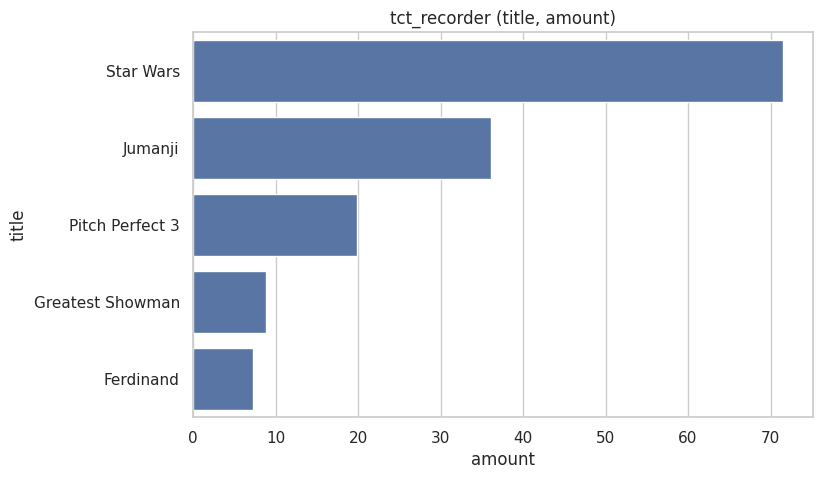

In [7]:
# 기본 그래프
plt.figure(figsize=(8, 5))
sns.barplot(data=boxoffice, x="amount", y="title")
plt.title("tct_recorder (title, amount)")
plt.show()

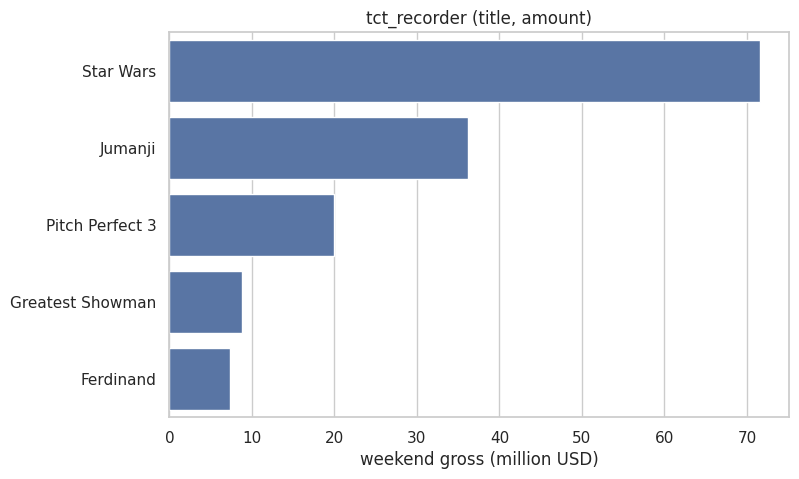

In [8]:
# 축 제목 변경
plt.figure(figsize=(8, 5))
sns.barplot(data=boxoffice, x="amount", y="title")
plt.title("tct_recorder (title, amount)")
plt.xlabel("weekend gross (million USD)")
plt.ylabel("") # scale_y_discreate(name=NULL)
plt.show()

- 데이터의 최대값이 70부근이므로 그래프의 limit를 80으로 설정한다.

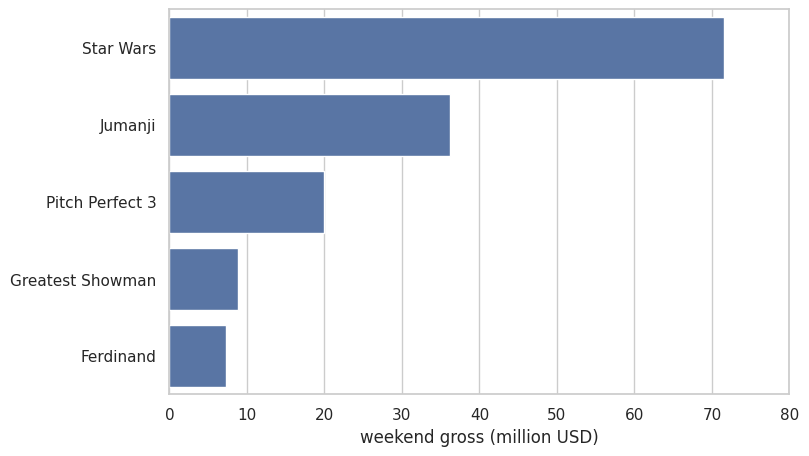

In [9]:
# limit 설정 - 축의 범위 설정: 그래프가 어디까지 보일지
plt.figure(figsize=(8, 5))

sns.barplot(data=boxoffice, x="amount", y="title")
plt.xlim(0, 80)
plt.xlabel("weekend gross (million USD)")
plt.ylabel("")

plt.show()

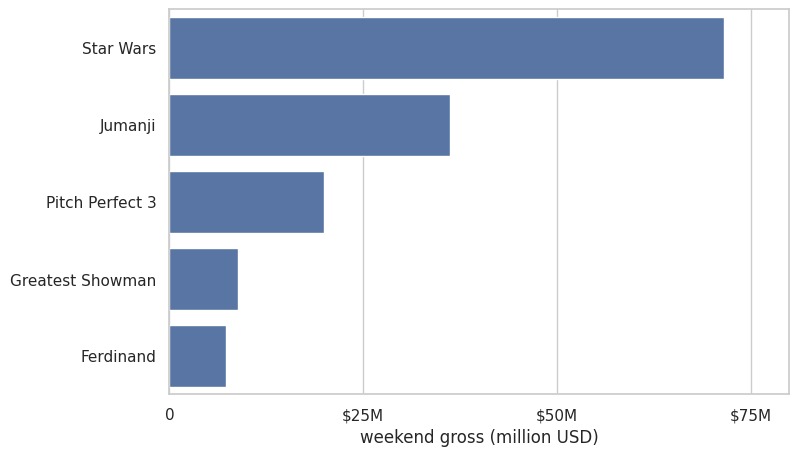

In [10]:
# breaks + label 설정
plt.figure(figsize=(8, 5))

sns.barplot(data=boxoffice, x="amount", y="title")
plt.xlim(0, 80)

# plt.xticks(): x축의 눈금 위치와 표시 텍스트를 직접 설정하는 함수
plt.xticks(
    [0, 25, 50, 75],
    ["0", "$25M", "$50M", "$75M"] # 표시 텍스트 변경
)
plt.xlabel("weekend gross (million USD)")
plt.ylabel("")

plt.show()

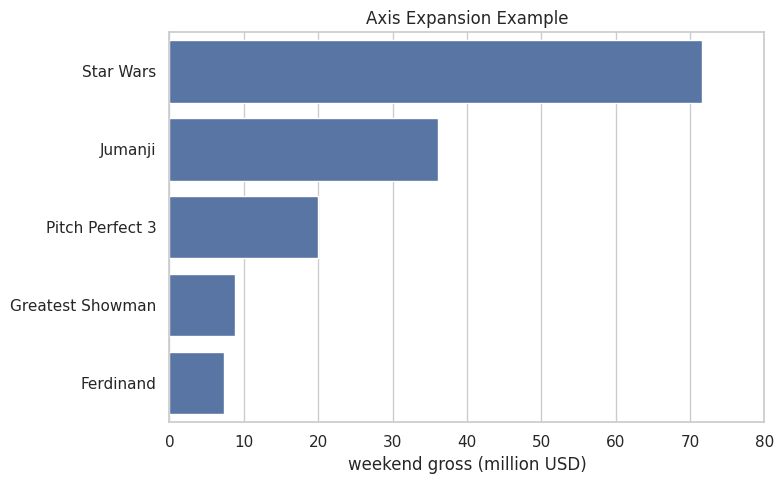

In [13]:
# margins 설정 - 값 차이를 좀 더 명확하게하기 위함.
fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot(data=boxoffice, x="amount", y="title", ax=ax)
ax.set_xlim(0, 80)

# R에서는 // ggplot expand = expansion(mult = c(0, 0.06))
# ax.set_xlim(0, boxoffice["amount"].max()) # 차이 체감
ax.margins(x=0.06)

ax.set_xlabel("weekend gross (million USD)")
ax.set_ylabel("")
ax.set_title("Axis Expansion Example")

plt.tight_layout()
plt.show()

# Scale functions define transformations
- tx_counties 데이터셋

In [14]:
display(tx_counties.head())

,state,name,FIPS,pop2010,pop2000,age_under_5,age_under_18,age_over_65,female,white,...,women_owned_firms,manufacturer_shipments_2007,mercent_whole_sales_2007,sales,sales_per_capita,accommodation_food_service,building_permits,fed_spending,area,density
0,Alabama,Autauga County,1001,54571,43671.0,6.6,26.8,12.0,51.3,78.5,...,31.7,NaN,NaN,598175.0,12003.0,88157.0,191,331142.0,594.44,91.8
1,Alabama,Baldwin County,1003,182265,140415.0,6.1,23.0,16.8,51.1,85.7,...,27.3,1410273.0,NaN,2966489.0,17166.0,436955.0,696,1119082.0,1589.78,114.6
2,Alabama,Barbour County,1005,27457,29038.0,6.2,21.9,14.2,46.9,48.0,...,27.0,NaN,NaN,188337.0,6334.0,NaN,10,240308.0,884.88,31.0
3,Alabama,Bibb County,1007,22915,20826.0,6.0,22.7,12.7,46.3,75.8,...,NaN,0.0,NaN,124707.0,5804.0,10757.0,8,163201.0,622.58,36.8
4,Alabama,Blount County,1009,57322,51024.0,6.3,24.6,14.7,50.5,92.6,...,23.2,341544.0,NaN,319700.0,5622.0,20941.0,18,294114.0,644.78,88.9


In [35]:
tx_counties['name'].value_counts()

,count
name,
Washington County,30
Jefferson County,25
Franklin County,24
Jackson County,23
Lincoln County,23
...,...
Denali Borough,1
Yakutat City and Borough,1
Powder River County,1


In [15]:
tx_counties.columns

Index(['state', 'name', 'FIPS', 'pop2010', 'pop2000', 'age_under_5',
       'age_under_18', 'age_over_65', 'female', 'white', 'black', 'native',
       'asian', 'pac_isl', 'two_plus_races', 'hispanic', 'white_not_hispanic',
       'no_move_in_one_plus_year', 'foreign_born', 'foreign_spoken_at_home',
       'hs_grad', 'bachelors', 'veterans', 'mean_work_travel', 'housing_units',
       'home_ownership', 'housing_multi_unit', 'median_val_owner_occupied',
       'households', 'persons_per_household', 'per_capita_income',
       'median_household_income', 'poverty', 'private_nonfarm_establishments',
       'private_nonfarm_employment',
       'percent_change_private_nonfarm_employment',
       'nonemployment_establishments', 'firms', 'black_owned_firms',
       'native_owned_firms', 'asian_owned_firms', 'pac_isl_owned_firms',
       'hispanic_owned_firms', 'women_owned_firms',
       'manufacturer_shipments_2007', 'mercent_whole_sales_2007', 'sales',
       'sales_per_capita', 'accommodati

In [16]:
tx_counties = tx_counties.sort_values('density', ascending=False)
tx_counties["index"] = range(1, len(tx_counties) + 1) # x축을 순위로 사용

In [19]:
display(tx_counties[['density', 'index']])

,density,index
1858,69467.5,1
1851,35369.1,2
1830,32903.6,3
1868,20553.6,4
223,17179.1,5
...,...,...
84,0.1,3139
2673,0.1,3140
94,0.1,3141
72,0.1,3142


- density

In [21]:
# popratio: 인구밀도
median_pop_2010 = tx_counties["pop2010"].median()
tx_counties["popratio_2010"] = tx_counties["pop2010"] / median_pop_2010

median_pop_2000 = tx_counties["pop2000"].median()
tx_counties["popratio_2000"] = tx_counties["pop2000"] / median_pop_2000

In [23]:
display(tx_counties[['density', 'index', 'popratio_2000', 'popratio_2010']])

,density,index,popratio_2000,popratio_2010
1858,69467.5,1,62.467287,61.332444
1851,35369.1,2,100.183924,96.867386
1830,32903.6,3,54.155153,53.568009
1868,20553.6,4,90.595701,86.271493
223,17179.1,5,31.564247,31.141857
...,...,...,...,...
84,0.1,3139,0.300106,0.364698
2673,0.1,3140,0.002723,0.003171
94,0.1,3141,0.032835,0.025602
72,0.1,3142,0.076926,0.070619


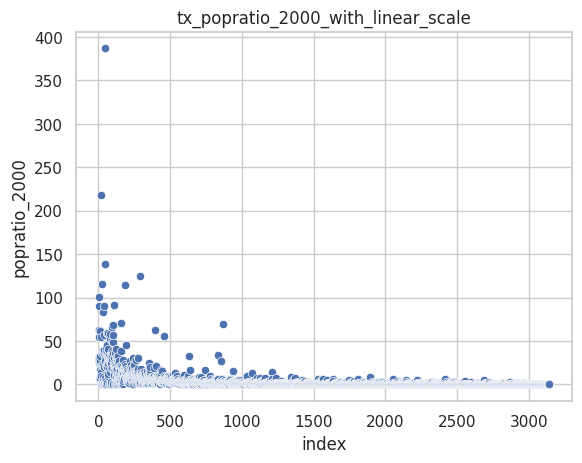

In [40]:
# 2000 분포 확인 - 선형 스케일
sns.scatterplot(data=tx_counties, x='index', y='popratio_2000')
plt.title("tx_popratio_2000_with_linear_scale")
plt.show()

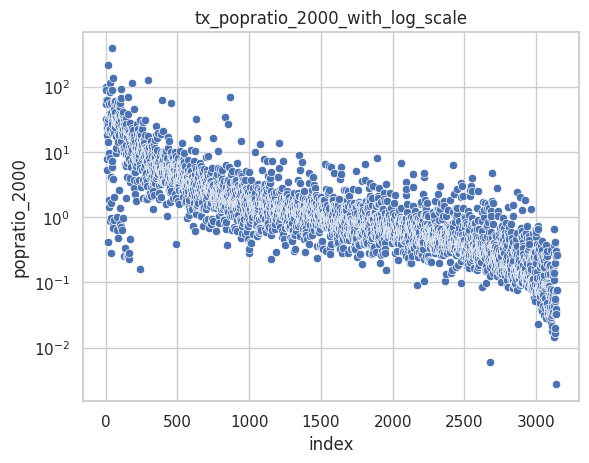

In [41]:
# 2000 분포 확인 - 로그 스케일
sns.scatterplot(data=tx_counties, x='index', y='popratio_2000')
plt.yscale("log")
plt.title("tx_popratio_2000_with_log_scale")
plt.show()

--> y를 로그 스케일로 변환했을 때 분포 구조가 더 잘보임

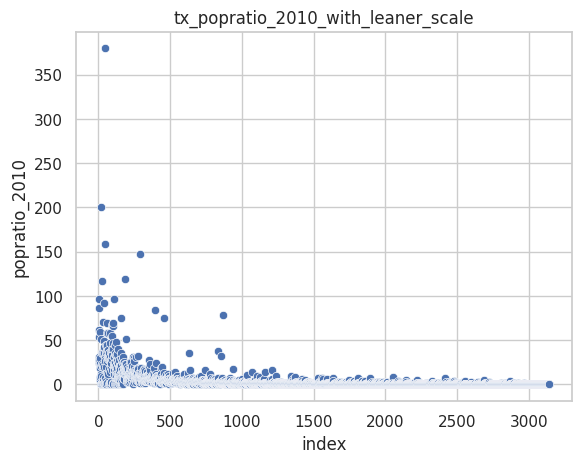

In [42]:
# 2000 분포 확인 - 선형 스케일
sns.scatterplot(data=tx_counties, x='index', y='popratio_2010')
plt.title("tx_popratio_2010_with_leaner_scale")
plt.show()

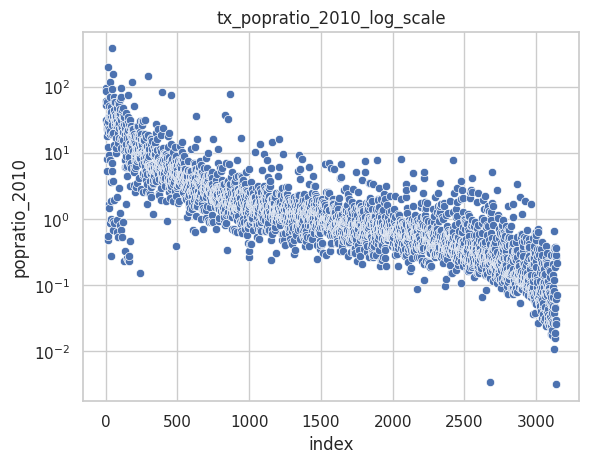

In [43]:
# 2010 분포 확인
sns.scatterplot(data=tx_counties, x='index', y='popratio_2010')
plt.yscale("log")
plt.title("tx_popratio_2010_log_scale")
plt.show()

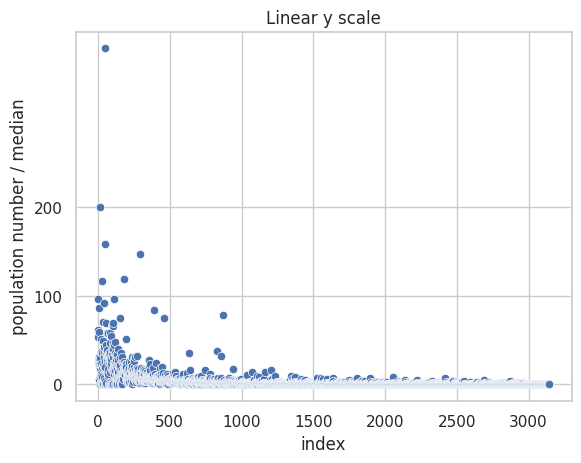

In [47]:
# 축 파라미터 설정하기 - name / breaks / lables
# popratio_2010 으로 확인

sns.scatterplot(data=tx_counties, x='index', y='popratio_2010')
# plt.yscale("log")

# 축 제목
plt.ylabel("population number / median")

# breaks, lables
plt.yticks(
    [0, 100, 200],
    ["0", "100", "200"])


plt.title("Linear y scale")
plt.show()

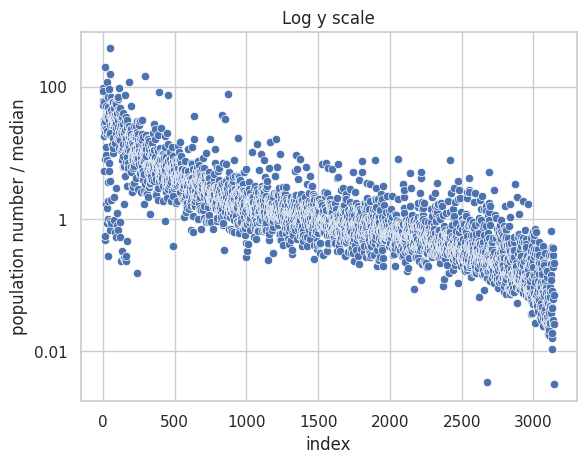

In [54]:
# 축 파라미터 설정하기 - name / breaks / lables
# popratio_2010 으로 확인

sns.scatterplot(data=tx_counties, x='index', y='popratio_2010')
plt.yscale("log")

# 축 제목
plt.ylabel("population number / median")

# breaks, lables
plt.yticks(
    [0.01, 1, 100],
    ["0.01", "1", "100"]
)

plt.title("Log y scale")
plt.show()

# Coords define coordinate system
- 좌표계 자체를 변환하기
- 기본 좌표계 =  직교 좌표계

In [57]:
# 데이터 확인
display(temperatures.head())

,location,station_id,temperature,month_name,month,day,date,day_of_year
0,Death Valley,USC00042319,51.0,Jan,1,1,0000-01-01,1
1,Death Valley,USC00042319,51.2,Jan,1,2,0000-01-02,2
2,Death Valley,USC00042319,51.3,Jan,1,3,0000-01-03,3
3,Death Valley,USC00042319,51.4,Jan,1,4,0000-01-04,4
4,Death Valley,USC00042319,51.6,Jan,1,5,0000-01-05,5


In [59]:
temperatures['location'].value_counts()

,count
location,
Death Valley,366
Houston,366
Chicago,366
San Diego,366


In [63]:
temperatures['day_of_year'].value_counts()

,count
day_of_year,
366,4
1,4
2,4
3,4
4,4
...,...
19,4
18,4
17,4


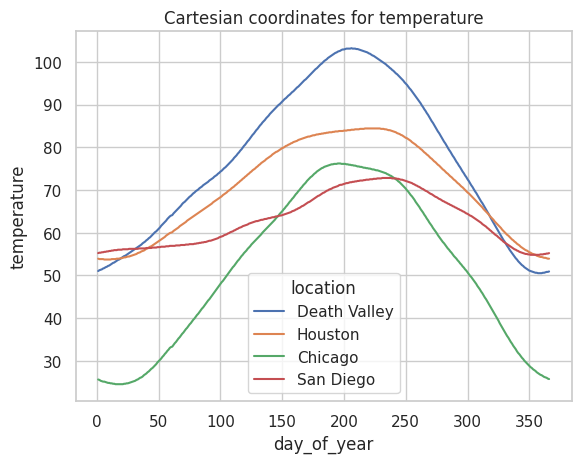

In [60]:
# 직교 좌표계로 확인하기
# lineplot - 시간에 따른 추세 확인
sns.lineplot(data=temperatures,
             x='day_of_year',
             y='temperature',
             hue='location'
             )

plt.title("Cartesian coordinates for temperature")
plt.show()

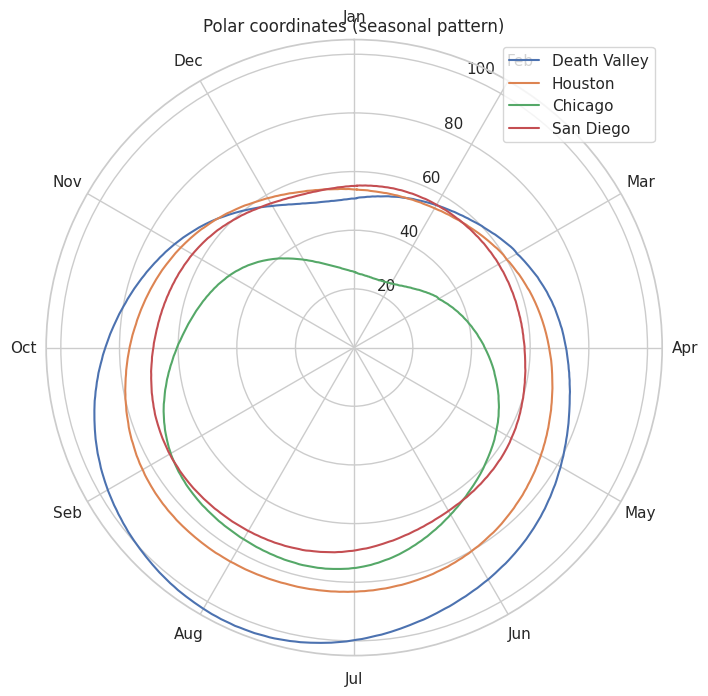

In [71]:
# polar 그래프로 확인하기 - 계절의 주기성 이용
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="polar")

for loc in temperatures["location"].unique():
  subset = temperatures[temperatures["location"] == loc]
  theta = 2 * np.pi * subset["day_of_year"] / 365 # 1년을 각도로 매핑하기
  r = subset["temperature"]
  ax.plot(theta, r, label=loc)


# 시작 위치 조정
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# 월 표시
months = np.linspace(0, 2*np.pi, 12, endpoint=False)
months_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                 "Jul", "Aug", "Seb", "Oct", "Nov", "Dec"]
ax.set_xticks(months)
ax.set_xticklabels(months_labels)

ax.set_ylim(0, 105)
ax.set_title("Polar coordinates (seasonal pattern)")

ax.legend()
plt.show()